# ISMN Data Processing Script
This script takes processes ISMN header-value data, generates CSV text file and dictionaries of station names and coordinates

In [178]:
from ismn.interface import ISMN_Interface
from datetime import datetime
import matplotlib.pyplot as plt
import random
import pandas
import json
%matplotlib inline

In [68]:
path_to_ismn_data = '..'

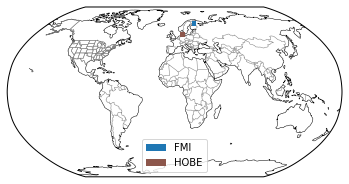

In [69]:
# #initialize interface, this can take up to a few minutes the first
# #time, since all metadata has to be collected

# ISMN_reader = ISMN_Interface(path_to_ismn_data)

# #plot available station on a map
# fig, ax = ISMN_reader.plot_station_locations()
# plt.show()

In [70]:
networks = ISMN_reader.list_networks()
print("Available Networks:")
print(networks)

Available Networks:
['FMI' 'HOBE']


In [71]:
# print list of stations for each network
for network in networks: 
    stations = ISMN_reader.list_stations(network)
    print("Available Stations in Network %s"%network)
    print(stations)

Available Stations in Network FMI
['SAA111' 'SAA112' 'SAA120' 'SOD011' 'SOD012' 'SOD013' 'SOD021' 'SOD022'
 'SOD023' 'SOD031' 'SOD032' 'SOD033' 'SOD071' 'SOD072' 'SOD073' 'SOD081'
 'SOD082' 'SOD083' 'SOD091' 'SOD092' 'SOD093' 'SOD101' 'SOD102' 'SOD103'
 'SOD130' 'SOD140' 'SODAWS']
Available Stations in Network HOBE
['1.01' '1.02' '1.03' '1.04' '1.05' '1.06' '1.07' '1.08' '1.09' '1.10'
 '2.01' '2.02' '2.03' '2.04' '2.05' '2.06b' '2.07' '2.08b' '2.09' '2.10'
 '2.11' '3.01' '3.02' '3.03' '3.04' '3.05' '3.06' '3.07' '3.08' '3.09']


# Generating CSV

In [120]:
current_time = datetime.now() 
# timestamp format
timestamp = current_time.strftime("%Y%m%d%H%M%S")
use_timestamp_in_filename = False

# string to append to filename, add timestamp if needed
if (use_timestamp_in_filename):
    filename_string = '_latlon_' + timestamp + '.csv'
else:
    filename_string = '_latlon.csv'

# create dataframe for each network and export to each network dataframe to csv
for network in networks: 
    stations = ISMN_reader.list_stations(network)
    network_df = pandas.DataFrame()
    network_df = pandas.DataFrame(columns = ['name', 'latitude', 'longitude'])
    for station in stations:
        station_obj = ISMN_reader.get_station(station)
        network_df = network_df.append({'name' : station_obj.station, 'latitude' : station_obj.latitude, 'longitude' : station_obj.longitude} , ignore_index=True)
    network_df.to_csv (network + filename_string, index = False, header=True, sep = " ")

# Generating dictionaries and exporting to text

In [166]:
for network in networks: 
    stations = ISMN_reader.list_stations(network)    
    dict = {}
    for station in stations:
        station_obj = ISMN_reader.get_station(station)
        dict[station_obj.station] = (station_obj.latitude, station_obj.longitude)
    ffilename = network + "_latlon_dict.txt"
    f = open(ffilename,"w")
    f.write(str(dict))
    f.close()

# Generating dictionaries and exporting to json

In [182]:
for network in networks: 
    stations = ISMN_reader.list_stations(network)    
    dict = {}
    for station in stations:
        station_obj = ISMN_reader.get_station(station)
        dict[station_obj.station] = (station_obj.latitude, station_obj.longitude)
#     print(type(dict))
    json_dump = json.dumps(dict)
#     print(json_dump)
    jfilename = network + "_latlon_dict.json"
    j = open(jfilename,"w")
    j.write(json_dump)
    j.close()

# Printing Dictionary Values

In [185]:
for network in networks: 
    stations = ISMN_reader.list_stations(network)    
    dict = {}
    for station in stations:
        station_obj = ISMN_reader.get_station(station)
        dict[station_obj.station] = (station_obj.latitude, station_obj.longitude)
        # test printing
        for keys,values in dict.items():
            print(network + " " + keys + " " + repr(values[0]) + " " + repr(values[1]))

FMI SAA111 68.33019 27.55062
FMI SAA111 68.33019 27.55062
FMI SAA112 68.33025 27.55076
FMI SAA111 68.33019 27.55062
FMI SAA112 68.33025 27.55076
FMI SAA120 68.33881 27.53543
FMI SAA111 68.33019 27.55062
FMI SAA112 68.33025 27.55076
FMI SAA120 68.33881 27.53543
FMI SOD011 67.36187 26.63378
FMI SAA111 68.33019 27.55062
FMI SAA112 68.33025 27.55076
FMI SAA120 68.33881 27.53543
FMI SOD011 67.36187 26.63378
FMI SOD012 67.36179 26.63378
FMI SAA111 68.33019 27.55062
FMI SAA112 68.33025 27.55076
FMI SAA120 68.33881 27.53543
FMI SOD011 67.36187 26.63378
FMI SOD012 67.36179 26.63378
FMI SOD013 67.36195 26.63378
FMI SAA111 68.33019 27.55062
FMI SAA112 68.33025 27.55076
FMI SAA120 68.33881 27.53543
FMI SOD011 67.36187 26.63378
FMI SOD012 67.36179 26.63378
FMI SOD013 67.36195 26.63378
FMI SOD021 67.36691 26.65176
FMI SAA111 68.33019 27.55062
FMI SAA112 68.33025 27.55076
FMI SAA120 68.33881 27.53543
FMI SOD011 67.36187 26.63378
FMI SOD012 67.36179 26.63378
FMI SOD013 67.36195 26.63378
FMI SOD021 67.